Author: Sean Tulin
<br>
Date: Mar. 27, 2023
<br>
PHYS 2030 W23

# <font color=#46769B>Lesson 11: Discrete Fourier Transform</font>

## <font color=#46769B>Introduction</font>

We have learned about Fourier series as a representation of a function $f(t)$, defined for $t$ in some interval $[0,T]$. 

Representation of a function in the frequency domain.

We will learn about the `scipy.signal` package, which contains numerous routines for signal processing.




## <font color=#46769B>Derivation</font>

The starting point of the Discrete Fourier Transform (DFT) is the Fourier series in terms of complex exponentials. Here is the Fourier series

$$f(t) = \sum_{k = -\infty}^{\infty} c_k  \, e^{i \omega_k t} \qquad (1) $$

and the Fourier coefficients are obtained as follows

$$c_k = \frac{1}{T} \int_0^T dt \, f(t) \, e^{-i \omega_k} \, , \qquad (2)$$

where $\omega_k = 2\pi k/T$. 

If we know what $f(t)$ is *analytically*, we can calculate the Fourier coefficients $c_k$. But suppose we have incomplete knowledge of $f(t)$, namely that we only know what it is *numerically* at a series of discrete points $t$. That is, we divide up the range $0 \le t < T$ into $N$ *evenly-spaced* discrete points of step width $h = T/N$:

$$t_0 = 0, \; t_1 = h, \; t_2 = 2h , \; t_3 = 3h , \;  ... \, , \;  t_{N-1} = (N-1)h\, ,$$

or more generally, $t_n = n h$ for $n = 0, 1..., N-1$. Note that we don't need to consider $t_N = Nh = T$ as a separate point since $f(T) = f(0)$ by periodicity of $f(t)$. Now, all the information about $f(t)$ is its values at these points

$$f_0 = f(t_0), \, f_1 = f(t_1) , \, f_2 = f(t_2) , \, ... \, , f_{N-1} = f(t_{N-1}) \, .$$  

The values $f_n$ are called __samples__ of $f(t)$ and $N$ is the number of samples. The quantity $h$ is the time between samples. The inverse quantity 

$$\nu_s = h^{-1} = \frac{N}{T}$$ 

is the number of samples per unit time, known as the __sampling frequency__.

Now we calculate the Fourier coefficients $c_k$. We obviously don't have enough information to do an integral, but we can approximate the integral as a [sum over rectangles](https://en.wikipedia.org/wiki/Riemann_sum), illustrated in the following figure:

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/DFT_fig.PNG" width="400">
</div>

The height of each rectangle is set by $f_n$, and all have the same width $h$. The area under the curve is (approximately) the total area of all the rectangles. However, to approximate Eq. (3), we want to multiply the area of each rectangle by an additional phase factor $e^{-i \omega_k t_n}$, since that is the integral we want to do. In summary, Eq. (2) is approximated as

$$c_k = \frac{1}{T} \sum_{n=0}^{N-1} h \, f_n \, e^{-i \omega_k t_n} 
= \frac{1}{N} \sum_{n=0}^{N-1} f_n \, e^{-2 \pi i k n /N} 
\, , \qquad (3) $$

where the last step follows from $h = T/N$ and $t_n = nh$. 

We have derived Eq. (3) as an *approximation* for calculating Fourier coefficients in the limit of incomplete knowledge of our function $f(t)$. We can also simply *define* Eq. (3) as its own separate concept: namely, Eq. (3) is the definition of the __Discrete Fourier Transform__. 

Further information on DFT can be found [here](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) or [here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html). There are also several nice videos on YouTube: [video 1](https://www.youtube.com/watch?v=nl9TZanwbBk), [video 2](https://www.youtube.com/watch?v=mkGsMWi_j4Q).

## <font color=#46769B>Discussion</font>

In our original discussion of Fourier series, we argued that there were an infinite number of Fourier coefficients $c_k$. This is true provided we have *complete* knowledge of the function $f(t)$, i.e. we know $f(t)$ at every point in the interval $[0,T]$. 

Now, we *incomplete* knowledge of the function, namely, we only know $N$ values $f_n = f(t_n)$. How many Fourier coefficients can we compute? This is limited by the number of samples: if we have $N$ samples, we can only compute $N$ coefficients, 

$$c_0, \, c_1, \, c_2 , \,  ... \, c_{N-1} \, .$$

If we try to calculate the next coefficient, $c_N$, we get

$$c_N = \frac{1}{N} \sum_{n=0}^{N-1} f_n \, e^{-2\pi i N n/N} = \frac{1}{N} \sum_{n=0}^{N-1} f_n  = c_0 \, ,$$

since $e^{-2\pi i n} = 1$. Similarly, we can show that $c_{N+1} = c_1$, $c_{N+2} = c_2$, etc. So, by periodicity of the phase factor, going beyond $N-1$, we just repeat coefficients that have already been calculated. The periodicity condition is

$$c_{k + N} = c_k \qquad (4) $$

Eq. (4) also applies to negative values of $k$. For example, 

$$c_{-1} = c_{N-1} , \; c_{-2} = c_{N-2} , \; c_{-3} = c_{N-3}, \; {\rm etc.} $$

or more generally $c_{-k} = c_{N-k}$.

It is not too surprising that we have $N$ complex numbers $c_k$ to represent a function in the frequency domain given that we started with $N$ complex numbers $f_n$ in the time domain. (If $f(t)$ is a real function, recall the Fourier coefficients satisfy $c_k^* =  c_{-k}$. Now we have $N$ real-valued samples $f_n$ described in the frequency domain by $N$ complex coefficients $c_k$ that satisfy $N$ constraints $c_k^* =  c_{N-k}$. So we have $2N - N = N$ real values.)

We understand the periodicity condition from a mathematical point of view, but it may still seem surprising. Recall that each values of $k$ corresponds to a Fourier mode

$$e^{i \omega_k t}$$

with angular frequency $\omega_k = 2\pi k/T$. How can $\omega_k$ and $\omega_{N+k}$ be the same since their frequencies are different? 

Let's see how this works with an example.

## <font color=#46769B>Example: cosine</font>

Let's illustrate an example for how DFT works with a simple example, a cosine function

$$f(t) = \cos(2\pi t) $$

which has period $T=1$. It is straightforward to read off the Fourier coefficient, $a_1 = 1$, and all other Fourier coefficients are zero. Therefore we have

$$c_1 = c_{-1} = \tfrac{1}{2} \, .$$

By periodicity, $c_{-1} = c_{N-1}$.

Now, let's go through the steps for computing the DFT:

1. Obtain samples $f_n$. Typically these are provided to you, but here I will generate them from $f(t)$. First, I need to decide on $N$, calculate the steps $t_n$, and then calculate $f_n = f(t_n)$. A useful function for computing $t_n$ is `numpy.arange(0,T,h)`, documented [here](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), which will generate steps
$$t_0, \, t_1, \, t_2 , \,  ... \, t_{N-1}$$
*without* including the final step in the interval like `numpy.linspace()` does.

2. Calculate the Fourier coefficients $c_k$ as a function of integer $k$, in the range from $0$ to $N-1$, using Eq. (3). We will write a function that will take as input samples $f_n$ and return an array of all Fourier coefficients $c_k$.


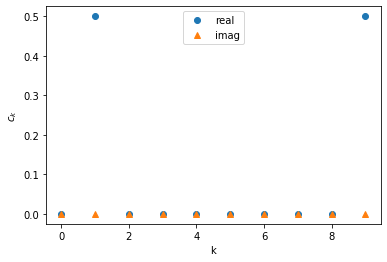

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate samples (I pick N=10)
N = 10
T = 1
h = T/N

# Generate samples
tn = np.arange(0,T,h)
fn = np.cos(2*np.pi*tn)

# Take DFT and calculate Fourier coefficients for integers k
def DFT(fn):
    
    # Calculate N automatically from number of samples
    N = len(fn)
    
    # Initialize empty array to save Fourier coefficients ck
    # Note want ck to be complex in general and we need to tell numpy this explicitly up front
    ck = np.zeros(N,dtype = 'complex')
    
    # Need to define values n = [0,1,2,...,N-1]
    n = np.array(range(N))
        
    # Calculate coefficients ck by looping through k
    for k in range(N):

        # Note fn and n are numpy arrays, so we are calculating 
        # all N terms at once and then summing over them
        ck[k] = 1/N * np.sum( fn * np.exp(-2j*np.pi*k*n/N) ) 
        
    return ck

# Compute DFT for fn given
ck = DFT(fn)
        
plt.plot(ck.real,'o',label='real')
plt.plot(ck.imag,'^',label='imag')
plt.xlabel('k')
plt.ylabel('$c_k$')
plt.legend()
plt.show()


It might seem weird that $c_9$ is mathematically equivalent to $c_{-1}$. The $c_9$ Fourier mode is

$$e^{18\pi i t/T} = \cos\left(\frac{18 \pi t}{T}\right) + i \sin\left(\frac{18 \pi t}{T}\right)$$

while the $c_{-1}$ Fourier mode is

$$e^{-2\pi i t/T} = \cos\left(\frac{2 \pi t}{T}\right) - i \sin\left(\frac{2\pi t}{T}\right)$$

Don't these two function oscillate much differently? This is the key difference between taking the Fourier series of a *continuous function* $f(t)$ vs taking the DFT for our discrete samples $f_n$.

Let's plot the two Fourier modes as continuous functions. Obviously, they are very different! 

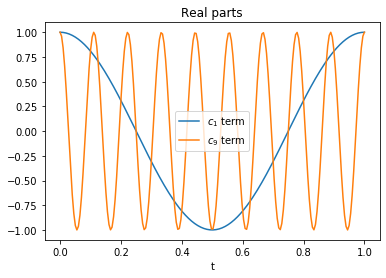

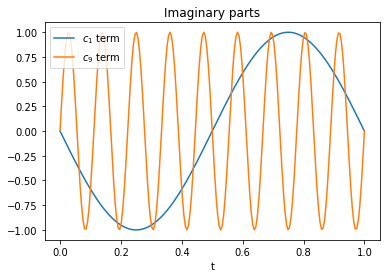

In [3]:
t = np.linspace(0,T,num=200)

plt.plot(t,np.cos(2*np.pi*t/T),label=r'$c_1$ term')
plt.plot(t,np.cos(18*np.pi*t/T),label=r'$c_9$ term')
plt.title('Real parts')
plt.legend()
plt.xlabel('t')
plt.show()

plt.plot(t,-np.sin(2*np.pi*t/T),label=r'$c_1$ term')
plt.plot(t,np.sin(18*np.pi*t/T),label=r'$c_9$ term')
plt.title('Imaginary parts')
plt.legend()
plt.xlabel('t')
plt.show()

Now let's plot the two functions *only at the sampling times* $t_n$. (We'll keep the original plot, but make the lines fainter.) You can see that *at the sampling times* both functions are exactly the same! DFT cannot distinguish between $k=-1$ and $k=N-1= 9$.

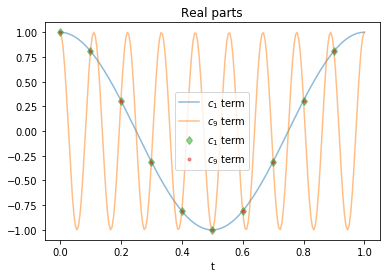

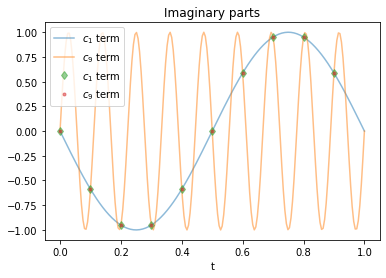

In [4]:
t = np.linspace(0,T,num=200)

plt.plot(t,np.cos(2*np.pi*t/T),label=r'$c_1$ term',alpha=0.5)
plt.plot(t,np.cos(18*np.pi*t/T),label=r'$c_9$ term',alpha=0.5)

tn = np.arange(0,T,h)
plt.plot(tn,np.cos(2*np.pi*tn/T),'d',label=r'$c_1$ term',alpha=0.5)
plt.plot(tn,np.cos(18*np.pi*tn/T),'.',label=r'$c_9$ term',alpha=0.5)

plt.title('Real parts')
plt.legend()
plt.xlabel('t')
plt.show()

plt.plot(t,-np.sin(2*np.pi*t/T),label=r'$c_1$ term',alpha=0.5)
plt.plot(t,np.sin(18*np.pi*t/T),label=r'$c_9$ term',alpha=0.5)

tn = np.arange(0,T,h)
plt.plot(tn,-np.sin(2*np.pi*tn/T),'d',label=r'$c_1$ term',alpha=0.5)
plt.plot(tn,np.sin(18*np.pi*tn/T),'.',label=r'$c_9$ term',alpha=0.5)

plt.title('Imaginary parts')
plt.legend()
plt.xlabel('t')
plt.show()

## <font color=#46769B>Fourier frequencies</font>

Our Fourier modes are labeled by $k$ values in the range

$$k = 0, \, 1, \, ... \, , \, N-1$$

The corresponding angular frequencies are $\omega_k = \frac{2\pi k}{T}$. Recall that __frequency__ is the number of periods per unit time, as opposed angular frequency which is the number of radians per unit time. Since one period corresponds to $2\pi$ radians, frequency and angular frequency are related by a factor of $2\pi$.

The frequencies of the Fourier modes are

$$\nu_k = \frac{\omega_k}{2\pi} = \frac{k}{T} \, .$$

We can also write the frequencies in terms of the sampling frequency $\nu_s = h^{-1} = N/T$, defined above:

$$\nu_k = \frac{k \nu_s}{N} \, .$$

Due to the periodicity of Fourier coefficients, $c_k = c_{N+k}$, there are different conventions for the frequencies. The two common conventions are:
- All positive values: These are the frequencies given above

$$\nu_0, \nu_1, \nu_2, ..., \nu_{N-1}$$

- Mix of positive and negative values: For values of $k \ge N/2$, we use the periodicity to write the frequencies as $\nu_{k-N}$ instead of $\nu_{k}$.

Let's illustrate both conventions through an example.



## <font color=#46769B>Example: cosine revisited</font>

Consider a function $f(t) = \cos(2\pi t)$. We generate $N=100$ samples $f_n$ by sampling $f(t)$ at times $t_n$ in the range $[0,10]$.

A few things:
- $T$ is the *entire* $t$ range for the samples. Here $T=10$. This is not the same as the period of $f(t)$, which is one. Recall that we motivated Fourier transform as defining $f(t)$ within a finite interval $[0,T]$.   
- The sampling rate is $\nu_s = N/T = 10$.

Let's now generate our samples, apply the DFT, and plot the Fourier coefficients vs frequency.

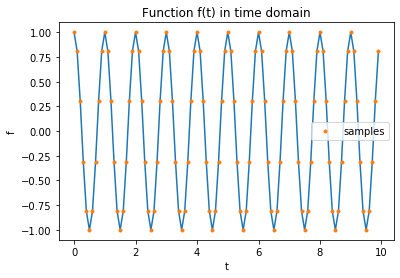

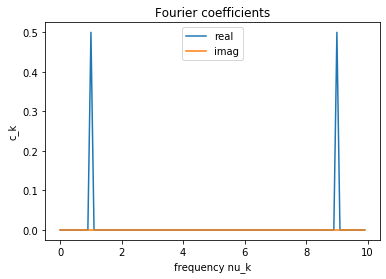

In [139]:
# Generate samples (I pick N=10)
N = 100
T = 10
h = T/N
nu_s = 1/h

# Generate samples
tn = np.arange(0,T,h)
fn = np.cos(2*np.pi*tn)

plt.plot(tn,fn)
plt.plot(tn,fn,'.',label='samples')
plt.legend()
plt.xlabel('t')
plt.ylabel('f')
plt.title('Function f(t) in time domain')
plt.show()

ck = DFT(fn)
k = np.arange(N)

# Fourier frequencies (convention 1)
nu_k = k * nu_s / N

plt.plot(nu_k,ck.real,label='real')
plt.plot(nu_k,ck.imag,label='imag')
plt.xlabel('frequency nu_k')
plt.ylabel('c_k')
plt.title('Fourier coefficients')
plt.legend()
plt.show()

It is not too surprising that we have a peak at $\nu_k = 1$, but we also have a peak at $\nu_k = 9$. According to the periodicity argument, this is equivalent to $\nu_k = -1$. This is made clear with the alternative convention. Now it is made clear that we have a signal at $\nu_k = \pm 1$, which makes sense for our cosine function above.

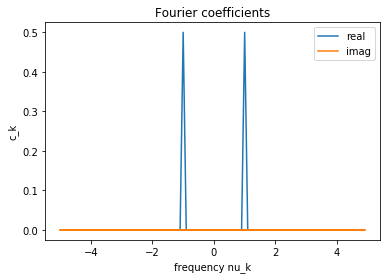

In [142]:
# Fourier frequencies (convention 2)
nu_k = np.where( k < N/2, k * nu_s / N, (k-N) * nu_s / N)

plt.plot(nu_k,ck.real,label='real')
plt.plot(nu_k,ck.imag,label='imag')
plt.xlabel('frequency nu_k')
plt.ylabel('c_k')
plt.title('Fourier coefficients')

plt.legend()
plt.show()


## <font color=#46769B>Periodogram</font>

The __periodogram__ or 

## <font color=#46769B>DFT with `scipy`</font>

In [163]:
from scipy import signal, fft

fn = np.loadtxt("https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/data/US_electricity_data_2021.csv")
fn = fn - np.mean(fn)

N = len(fn)

ck = DFT(fn)*N
k = np.arange(N)
nu_k = np.where(k < N/2, k/N, (k-N)/N)

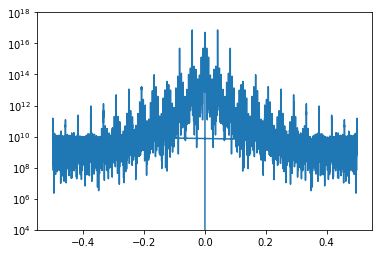

In [164]:
plt.plot(nu_k, np.abs(ck)**2)
plt.yscale('log')
plt.ylim([1e4,1e18])
plt.show()

In [174]:
ck_fft = fft.fft(fn,norm='forward')

plt.plot(nu_k, np.abs(ck_fft)**2)
plt.yscale('log')
plt.ylim([1e4,1e18])
plt.show()

ValueError: Invalid norm value forward, should be None or "ortho".

In [176]:
import scipy 
print(scipy.__version__)

1.4.1


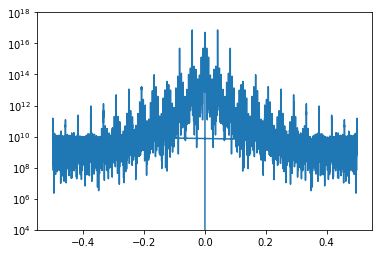

In [172]:
nu, p = signal.periodogram(fn,return_onesided=False,scaling='spectrum')
plt.plot(nu,p*N**2)
plt.yscale('log')
plt.ylim([1e4,1e18])
plt.show()